In [1]:
# Importing libraries and dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
from animals_project.animals.functions import data_import
importing = data_import()
importing.import_zoo()
importing.import_class_types()

ModuleNotFoundError: No module named 'animals_project.animals'; 'animals_project' is not a package

# Class types visualization

In [3]:
zoo = pd.read_csv('C:/Users/admin/Downloads/animal_DB/zoo.csv')
class_types = pd.read_csv('C:/Users/admin/Downloads/animal_DB/class.csv')
animal_classes = class_types.iloc[:,2]
n_of_animals = class_types.iloc[:,1]

animals_distribution = dict(zip(animal_classes, n_of_animals))
print(animals_distribution)


{'Mammal': 41, 'Bird': 20, 'Reptile': 5, 'Fish': 13, 'Amphibian': 4, 'Bug': 8, 'Invertebrate': 10}


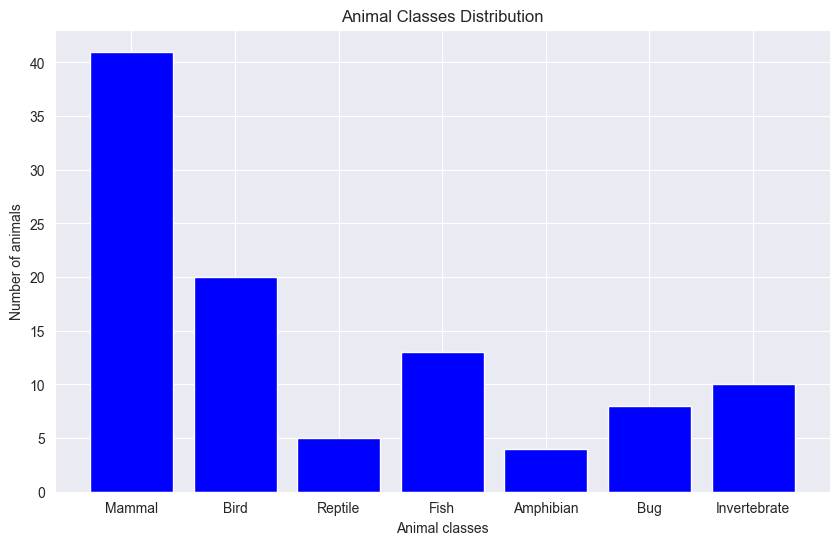

In [49]:
animal_classes = ('Mammal', 'Bird', 'Reptile', 'Fish', 'Amphibian', 'Bug', 'Invertebrate')
n_of_animals = (41, 20, 5, 13, 4, 8, 10)

plt.figure(figsize=(10, 6))
plt.bar(animal_classes, n_of_animals, color='blue')
plt.xlabel('Animal classes')
plt.ylabel('Number of animals')
plt.title('Animal Classes Distribution')
plt.show()

In [4]:
from animals_project.animals.functions import Visualizations
plot = Visualizations()
plot.distribution_plot(animal_classes, n_of_animals)


ModuleNotFoundError: No module named 'animals_project.animals'; 'animals_project' is not a package

In [5]:
df=pd.merge(zoo,class_types,how='left',left_on='class_type',right_on='Class_Number')
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,fins,legs,tail,domestic,catsize,class_type,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,antelope,1,0,0,1,0,0,0,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,1,0,0,4,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
3,bear,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
4,boar,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."


# Data preparation

## splitting data into training set and testing set

In [6]:
X = zoo.iloc[:, 1:17]  # only the features 
Y = zoo.iloc[:, 17]    #only the label
  
X.head()
Y.head()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42, stratify = Y)
#random state is pseudo-random number parameter that allows you to reproduce the same train test split each time you run the code, sklearn suggests 42
#the stratify parameter splits the dataset in a way that the proportion of values in the sample will be the same as the proportion provided with this parameter.

In [7]:
np.array(X_train)
np.array(X_test)
print("Size of the training set:", len(X_train))
print("Size of the test set:", len(X_test))
# the algorithm will learn only a sample (70 in training) and will predict on the others 31 without inserting the animals from which it learned

Size of the training set: 70
Size of the test set: 31


## feature scaling

In [8]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
print(X_train)

[[-0.81649658 -0.5         0.81649658 ...  0.63245553 -0.38411064
   1.15470054]
 [-0.81649658 -0.5         0.81649658 ... -1.58113883 -0.38411064
  -0.8660254 ]
 [-0.81649658  2.          0.81649658 ...  0.63245553  2.60341656
  -0.8660254 ]
 ...
 [-0.81649658 -0.5         0.81649658 ...  0.63245553 -0.38411064
  -0.8660254 ]
 [ 1.22474487 -0.5        -1.22474487 ... -1.58113883 -0.38411064
   1.15470054]
 [-0.81649658  2.          0.81649658 ...  0.63245553  2.60341656
  -0.8660254 ]]


In [10]:
print(X_test)

[[-0.81649658  2.          0.81649658 -0.81649658  1.83711731 -0.72231512
  -1.15470054 -1.18903032  0.47756693  0.47756693 -0.30618622 -0.47756693
  -0.41606078  0.63245553 -0.38411064 -0.8660254 ]
 [-0.81649658  2.          0.81649658 -0.81649658 -0.54433105  1.38443731
   0.8660254  -1.18903032  0.47756693  0.47756693 -0.30618622 -0.47756693
  -0.41606078  0.63245553 -0.38411064  1.15470054]
 [-0.81649658  2.          0.81649658 -0.81649658  1.83711731 -0.72231512
  -1.15470054 -1.18903032  0.47756693  0.47756693 -0.30618622 -0.47756693
  -0.41606078  0.63245553 -0.38411064 -0.8660254 ]
 [-0.81649658  2.          0.81649658 -0.81649658  1.83711731  1.38443731
  -1.15470054 -1.18903032  0.47756693  0.47756693 -0.30618622 -0.47756693
  -0.41606078  0.63245553 -0.38411064 -0.8660254 ]
 [ 1.22474487 -0.5        -1.22474487  1.22474487 -0.54433105 -0.72231512
   0.8660254   0.84102145  0.47756693  0.47756693 -0.30618622 -0.47756693
   0.57120208  0.63245553 -0.38411064  1.15470054]
 [ 1.

In [11]:
X_test.shape

(31, 16)

# K Nearest Neighbors

## implementation

In [12]:
classifier_knn = KNeighborsClassifier()
classifier_knn.fit(X_train, Y_train)

KNeighborsClassifier()

## predicting a new result

In [13]:
##predicting a new result
Y_pred_knn = classifier_knn.predict(X_test)
print(Y_pred_knn)

[2 2 2 2 1 6 1 1 2 3 1 2 4 1 7 4 1 1 1 5 4 1 1 4 1 4 7 1 7 6 1]


In [14]:
print(Y_test)


100    2
58     2
43     2
21     2
10     1
40     6
50     1
4      1
87     2
80     3
70     1
37     2
7      4
44     1
53     7
60     4
84     1
47     1
94     1
89     5
92     4
93     1
49     1
12     4
31     1
76     3
77     7
65     1
14     7
51     6
22     1
Name: class_type, dtype: int64


## accuracy KNN

In [15]:
##accuracy KNN
print("Test Accuracy : ",classifier_knn.score(X_test,Y_test))
print("Train Accuracy : ",classifier_knn.score(X_train,Y_train))


Test Accuracy :  0.967741935483871
Train Accuracy :  0.9714285714285714


## results comparison

In [16]:
tmp_knn = pd.DataFrame(zoo)
pred_knn = pd.DataFrame(Y_pred_knn,dtype=int, index=Y_test.index)
tmp_knn['prediction'] = pred_knn
print(tmp_knn)
print(tmp_knn.shape)

tmp_knn = tmp_knn.dropna()
print(tmp_knn)

    animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0      aardvark     1         0     0     1         0        0         1   
1      antelope     1         0     0     1         0        0         0   
2          bass     0         0     1     0         0        1         1   
3          bear     1         0     0     1         0        0         1   
4          boar     1         0     0     1         0        0         1   
..          ...   ...       ...   ...   ...       ...      ...       ...   
96      wallaby     1         0     0     1         0        0         0   
97         wasp     1         0     1     0         1        0         0   
98         wolf     1         0     0     1         0        0         1   
99         worm     0         0     1     0         0        0         0   
100        wren     0         1     1     0         1        0         0   

     toothed  backbone  breathes  venomous  fins  legs  tail  domestic  \
0          1 

In [17]:
for i in range(tmp_knn.shape[0]):
    if tmp_knn.iloc[i][17] != tmp_knn.iloc[i][18]:
        print('  '+str(tmp_knn.iloc[i][0]))
        print('class type: '+str(tmp_knn.iloc[i][17]))
        print('prediction: '+str(tmp_knn.iloc[i][18]))

  seasnake
class type: 3
prediction: 4.0


C:\Users\admin\AppData\Local\Temp\ipykernel_12600\1949419264.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if tmp_knn.iloc[i][17] != tmp_knn.iloc[i][18]:
C:\Users\admin\AppData\Local\Temp\ipykernel_12600\1949419264.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('  '+str(tmp_knn.iloc[i][0]))
C:\Users\admin\AppData\Local\Temp\ipykernel_12600\1949419264.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('class t

# Decision tree 

## implementation

In [19]:
classifier_dt = DecisionTreeClassifier()
classifier_dt.fit(X_train, Y_train)

DecisionTreeClassifier()

## predicting a new result

In [20]:
## predictions
y_pred_tree = classifier_dt.predict(X_test)
print(y_pred_tree)

[2 2 2 2 1 6 1 1 2 3 1 2 4 1 7 4 1 1 1 5 4 1 1 4 1 5 7 1 7 6 1]


In [21]:
print(Y_test)

100    2
58     2
43     2
21     2
10     1
40     6
50     1
4      1
87     2
80     3
70     1
37     2
7      4
44     1
53     7
60     4
84     1
47     1
94     1
89     5
92     4
93     1
49     1
12     4
31     1
76     3
77     7
65     1
14     7
51     6
22     1
Name: class_type, dtype: int64


## decision tree accuracy

In [22]:
print("Test Accuracy : ",classifier_dt.score(X_test,Y_test))
print("Train Accuracy : ",classifier_dt.score(X_train,Y_train))

Test Accuracy :  0.967741935483871
Train Accuracy :  1.0


## results comparison

In [23]:

tmp_tree = pd.DataFrame(zoo)
pred_dt = pd.DataFrame(y_pred_tree,dtype=int, index=Y_test.index)
tmp_tree['prediction'] = pred_dt
#print(tmp_tree)
print(tmp_tree.shape)

tmp_tree = tmp_tree.dropna()
print(tmp_tree)

(101, 19)
    animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
4          boar     1         0     0     1         0        0         1   
7          carp     0         0     1     0         0        1         0   
10      cheetah     1         0     0     1         0        0         1   
12         chub     0         0     1     0         0        1         1   
14         crab     0         0     1     0         0        1         1   
21         duck     0         1     1     0         1        1         0   
22     elephant     1         0     0     1         0        0         0   
31         goat     1         0     0     1         0        0         0   
37         hawk     0         1     1     0         1        0         1   
40     housefly     1         0     1     0         1        0         0   
43         lark     0         1     1     0         1        0         0   
44      leopard     1         0     0     1         0        0         1   
47

In [24]:
for i in range(tmp_tree.shape[0]):
    if tmp_tree.iloc[i][17] != tmp_tree.iloc[i][18]:
        print('  '+str(tmp_tree.iloc[i][0]))
        print('class type: '+str(tmp_tree.iloc[i][17]))
        print('prediction: '+str(tmp_tree.iloc[i][18]))

  seasnake
class type: 3
prediction: 5.0


C:\Users\admin\AppData\Local\Temp\ipykernel_12600\4182168241.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if tmp_tree.iloc[i][17] != tmp_tree.iloc[i][18]:
C:\Users\admin\AppData\Local\Temp\ipykernel_12600\4182168241.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('  '+str(tmp_tree.iloc[i][0]))
C:\Users\admin\AppData\Local\Temp\ipykernel_12600\4182168241.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('clas

# Random Forest

## implementation

In [25]:
classifier_RF = RandomForestClassifier()
classifier_RF.fit(X_train, Y_train)

RandomForestClassifier()

## predict a new result

In [26]:
y_pred_forest = classifier_RF.predict(X_test)
print(y_pred_forest)

[2 2 2 2 1 6 1 1 2 3 1 2 4 1 7 4 1 1 1 5 4 1 1 4 1 4 7 1 7 6 1]


In [27]:
print(Y_test)

100    2
58     2
43     2
21     2
10     1
40     6
50     1
4      1
87     2
80     3
70     1
37     2
7      4
44     1
53     7
60     4
84     1
47     1
94     1
89     5
92     4
93     1
49     1
12     4
31     1
76     3
77     7
65     1
14     7
51     6
22     1
Name: class_type, dtype: int64


## random forest accuracy

In [28]:
print("Test Accuracy : ",classifier_RF.score(X_test,Y_test))
print("Train Accuracy : ",classifier_RF.score(X_train,Y_train))

Test Accuracy :  0.967741935483871
Train Accuracy :  1.0


## results comparison

In [29]:

tmp_forest = pd.DataFrame(zoo)
pred_forest = pd.DataFrame(y_pred_forest,dtype=int, index=Y_test.index)
tmp_forest['prediction'] = pred_forest
#print(tmp_tree)
#print(tmp_forest.shape)

tmp_forest = tmp_forest.dropna()
print(tmp_forest)

    animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
4          boar     1         0     0     1         0        0         1   
7          carp     0         0     1     0         0        1         0   
10      cheetah     1         0     0     1         0        0         1   
12         chub     0         0     1     0         0        1         1   
14         crab     0         0     1     0         0        1         1   
21         duck     0         1     1     0         1        1         0   
22     elephant     1         0     0     1         0        0         0   
31         goat     1         0     0     1         0        0         0   
37         hawk     0         1     1     0         1        0         1   
40     housefly     1         0     1     0         1        0         0   
43         lark     0         1     1     0         1        0         0   
44      leopard     1         0     0     1         0        0         1   
47         l

In [30]:
for i in range(tmp_forest.shape[0]):
    if tmp_forest.iloc[i][17] != tmp_forest.iloc[i][18]:
        print('  '+str(tmp_forest.iloc[i][0]))
        print('class type: '+str(tmp_forest.iloc[i][17]))
        print('prediction: '+str(tmp_forest.iloc[i][18]))

  seasnake
class type: 3
prediction: 4.0


C:\Users\admin\AppData\Local\Temp\ipykernel_12600\1003261201.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if tmp_forest.iloc[i][17] != tmp_forest.iloc[i][18]:
C:\Users\admin\AppData\Local\Temp\ipykernel_12600\1003261201.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('  '+str(tmp_forest.iloc[i][0]))
C:\Users\admin\AppData\Local\Temp\ipykernel_12600\1003261201.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print

# Support Vector Machine

## implementation

In [31]:

classifier_svm = svm.SVC()
classifier_svm.fit(X_train, Y_train)

SVC()

## predict a new result

In [32]:
## predictions
y_pred_svm = classifier_svm.predict(X_test)
print(y_pred_svm)

[2 2 2 2 1 6 1 1 2 3 1 2 4 1 7 4 1 1 1 5 4 1 1 4 1 4 7 1 7 6 1]


In [33]:
print(Y_test)

100    2
58     2
43     2
21     2
10     1
40     6
50     1
4      1
87     2
80     3
70     1
37     2
7      4
44     1
53     7
60     4
84     1
47     1
94     1
89     5
92     4
93     1
49     1
12     4
31     1
76     3
77     7
65     1
14     7
51     6
22     1
Name: class_type, dtype: int64


## SVM accuracy

In [34]:
##accuracy SVM
print("Test Accuracy : ",classifier_svm.score(X_test,Y_test))
print("Train Accuracy : ",classifier_svm.score(X_train,Y_train))


Test Accuracy :  0.967741935483871
Train Accuracy :  1.0


## results comparison

In [35]:

tmp_svm = pd.DataFrame(zoo)
pred_svm = pd.DataFrame(y_pred_svm,dtype=int, index=Y_test.index)
tmp_svm['prediction'] = pred_svm
#print(tmp_tree)
print(tmp_svm.shape)

tmp_svm = tmp_svm.dropna()
print(tmp_svm)
for i in range(tmp_svm.shape[0]):
    if tmp_svm.iloc[i][17] != tmp_svm.iloc[i][18]:
        print('  '+str(tmp_svm.iloc[i][0]))
        print('class type: '+str(tmp_svm.iloc[i][17]))
        print('prediction: '+str(tmp_svm.iloc[i][18]))

(101, 19)
    animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
4          boar     1         0     0     1         0        0         1   
7          carp     0         0     1     0         0        1         0   
10      cheetah     1         0     0     1         0        0         1   
12         chub     0         0     1     0         0        1         1   
14         crab     0         0     1     0         0        1         1   
21         duck     0         1     1     0         1        1         0   
22     elephant     1         0     0     1         0        0         0   
31         goat     1         0     0     1         0        0         0   
37         hawk     0         1     1     0         1        0         1   
40     housefly     1         0     1     0         1        0         0   
43         lark     0         1     1     0         1        0         0   
44      leopard     1         0     0     1         0        0         1   
47

C:\Users\admin\AppData\Local\Temp\ipykernel_12600\3708982311.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if tmp_svm.iloc[i][17] != tmp_svm.iloc[i][18]:
C:\Users\admin\AppData\Local\Temp\ipykernel_12600\3708982311.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('  '+str(tmp_svm.iloc[i][0]))
C:\Users\admin\AppData\Local\Temp\ipykernel_12600\3708982311.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('clas

# Naive Bayes

## implementation

In [36]:

classifier_nb = GaussianNB()
classifier_nb.fit(X_train, Y_train)

GaussianNB()

## predict a new result

In [37]:
## predictions
y_pred_NB = classifier_nb.predict(X_test) 
print(y_pred_NB)

[2 2 2 2 1 6 1 1 2 3 1 2 4 1 7 4 1 1 1 5 4 1 1 4 1 7 7 1 7 6 1]


In [38]:
print(Y_test)

100    2
58     2
43     2
21     2
10     1
40     6
50     1
4      1
87     2
80     3
70     1
37     2
7      4
44     1
53     7
60     4
84     1
47     1
94     1
89     5
92     4
93     1
49     1
12     4
31     1
76     3
77     7
65     1
14     7
51     6
22     1
Name: class_type, dtype: int64


## NB accuracy

In [39]:
print("Test Accuracy : ",classifier_nb.score(X_test,Y_test))
print("Train Accuracy : ",classifier_nb.score(X_train,Y_train))


Test Accuracy :  0.967741935483871
Train Accuracy :  1.0


## results comparison

In [40]:
 
tmp_NB = pd.DataFrame(zoo)
pred_NB = pd.DataFrame(y_pred_NB,dtype=int, index=Y_test.index)
tmp_NB['prediction'] = pred_NB
#print(tmp_tree)
print(tmp_NB.shape)

tmp_NB = tmp_NB.dropna()
print(tmp_NB)
for i in range(tmp_NB.shape[0]):
    if tmp_NB.iloc[i][17] != tmp_NB.iloc[i][18]:
        print('  '+str(tmp_NB.iloc[i][0]))
        print('class type: '+str(tmp_NB.iloc[i][17]))
        print('prediction: '+str(tmp_NB.iloc[i][18]))
        


(101, 19)
    animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
4          boar     1         0     0     1         0        0         1   
7          carp     0         0     1     0         0        1         0   
10      cheetah     1         0     0     1         0        0         1   
12         chub     0         0     1     0         0        1         1   
14         crab     0         0     1     0         0        1         1   
21         duck     0         1     1     0         1        1         0   
22     elephant     1         0     0     1         0        0         0   
31         goat     1         0     0     1         0        0         0   
37         hawk     0         1     1     0         1        0         1   
40     housefly     1         0     1     0         1        0         0   
43         lark     0         1     1     0         1        0         0   
44      leopard     1         0     0     1         0        0         1   
47

C:\Users\admin\AppData\Local\Temp\ipykernel_12600\3479165843.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if tmp_NB.iloc[i][17] != tmp_NB.iloc[i][18]:
C:\Users\admin\AppData\Local\Temp\ipykernel_12600\3479165843.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('  '+str(tmp_NB.iloc[i][0]))
C:\Users\admin\AppData\Local\Temp\ipykernel_12600\3479165843.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('class t

# algorithm comparison

In [41]:

algorithms = pd.DataFrame({
    'Model': ["K Neighbors", "Decision Tree",
     "Random Forest", "SVM ", "Naive Bayes"],
    'Score': [classifier_knn.score(X_test,Y_test),
     classifier_dt.score(X_test,Y_test),
     classifier_RF.score(X_test,Y_test),
     classifier_svm.score(X_test,Y_test), 
     classifier_nb.score(X_test,Y_test)]})

algorithms.sort_values(by='Score', ascending=False)




,Model,Score
0,K Neighbors,0.967742
1,Decision Tree,0.967742
2,Random Forest,0.967742
3,SVM,0.967742
4,Naive Bayes,0.967742


In [42]:
# correlation analysis

In [43]:
from animals_project.animals.functions import Visualizations
plot = Visualizations()
plot.correlation_plot()


ModuleNotFoundError: No module named 'animals_project.animals'; 'animals_project' is not a package

<Axes: title={'center': 'Correlation matrix'}>

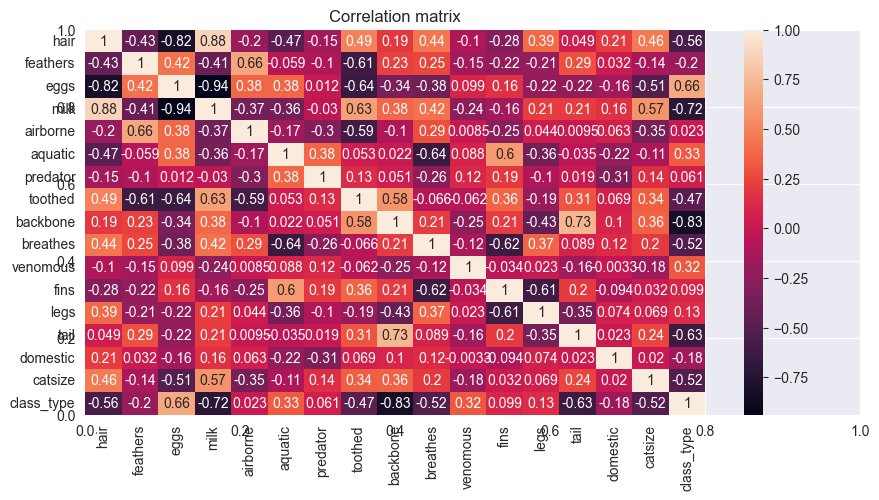

In [50]:
zoo = pd.read_csv('C:/Users/admin/Downloads/animal_DB/zoo.csv')
plt.subplots(figsize=(10, 5))  # 1000x500
ax = plt.axes()
ax.set_title('Correlation matrix')
corr = zoo.iloc[:, 1:].corr()
sns.heatmap(corr, annot=True, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [44]:
df.iloc[:, 1:19].groupby("Class_Number").mean()


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
Class_Number,,,,,,,,,,,,,,,,,
1,0.95122,0.0,0.02439,1.0,0.04878,0.146341,0.536585,0.97561,1.0,1.0,0.000000,0.097561,3.365854,0.853659,0.195122,0.780488,1.0
2,0.00000,1.0,1.00000,0.0,0.80000,0.300000,0.450000,0.00000,1.0,1.0,0.000000,0.000000,2.000000,1.000000,0.150000,0.300000,2.0
3,0.00000,0.0,0.80000,0.0,0.00000,0.200000,0.800000,0.80000,1.0,0.8,0.400000,0.000000,1.600000,1.000000,0.000000,0.200000,3.0
4,0.00000,0.0,1.00000,0.0,0.00000,1.000000,0.692308,1.00000,1.0,0.0,0.076923,1.000000,0.000000,1.000000,0.076923,0.307692,4.0
5,0.00000,0.0,1.00000,0.0,0.00000,1.000000,0.750000,1.00000,1.0,1.0,0.250000,0.000000,4.000000,0.250000,0.000000,0.000000,5.0
6,0.50000,0.0,1.00000,0.0,0.75000,0.000000,0.125000,0.00000,0.0,1.0,0.250000,0.000000,6.000000,0.000000,0.125000,0.000000,6.0
7,0.00000,0.0,0.90000,0.0,0.00000,0.600000,0.800000,0.00000,0.0,0.3,0.200000,0.000000,3.700000,0.100000,0.000000,0.100000,7.0


# K Means Clustering

## the elbow method

C:\Users\admin\.pyenv\pyenv-win\versions\3.12.0rc3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\admin\.pyenv\pyenv-win\versions\3.12.0rc3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\admin\.pyenv\pyenv-win\versions\3.12.0rc3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\admin\.pyenv\pyenv-win\versions\3.12.0rc3\Lib\site-packages\sklearn\cluster\_kmeans.py:1

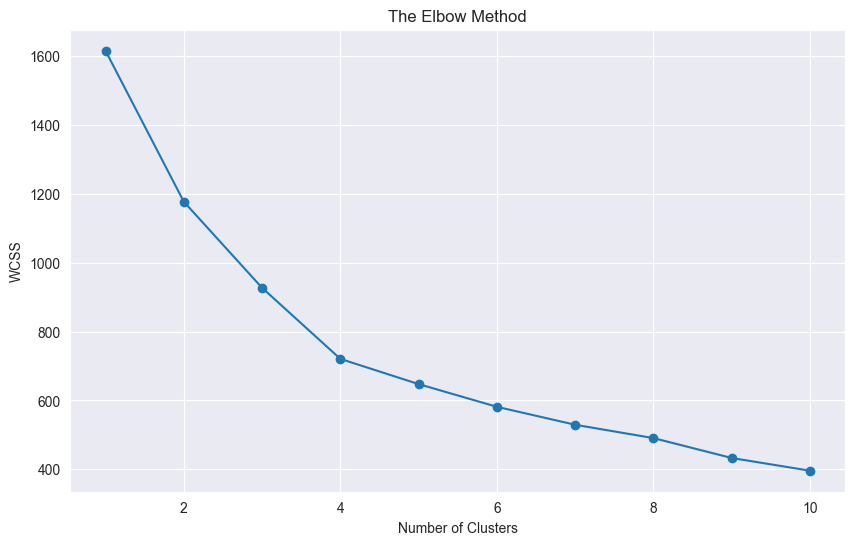

In [48]:


# Select relevant features for clustering
animal_features = zoo[['hair', 'feathers', 'eggs', 'milk', 'airborne',
                       'aquatic', 'predator', 'toothed', 'backbone', 'breathes',
                       'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(animal_features)

# Initialize an empty list to store the inertia values (within-cluster sum of squares)
wcss = []

# Try different values of k (number of clusters)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [45]:
from animals_project.animals.functions import Visualizations
plot = Visualizations()
plot.elbow_plot(animal_features)

ModuleNotFoundError: No module named 'animals_project.animals'; 'animals_project' is not a package

## implementation and clusters visualization

In [46]:
from animals_project.animals.functions import kmeans
kmeans()

ModuleNotFoundError: No module named 'animals_project.animals'; 'animals_project' is not a package

C:\Users\admin\.pyenv\pyenv-win\versions\3.12.0rc3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


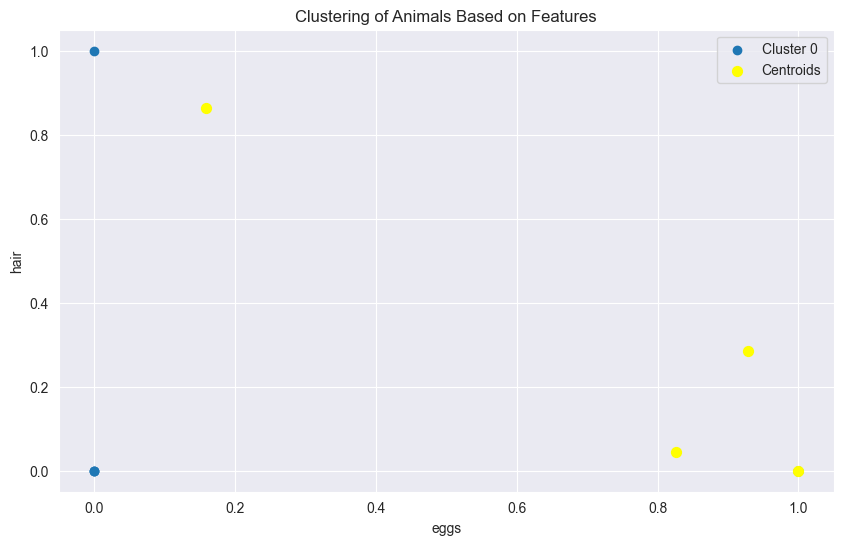

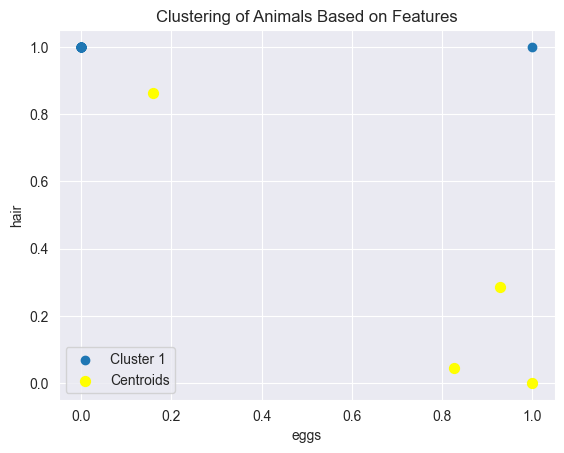

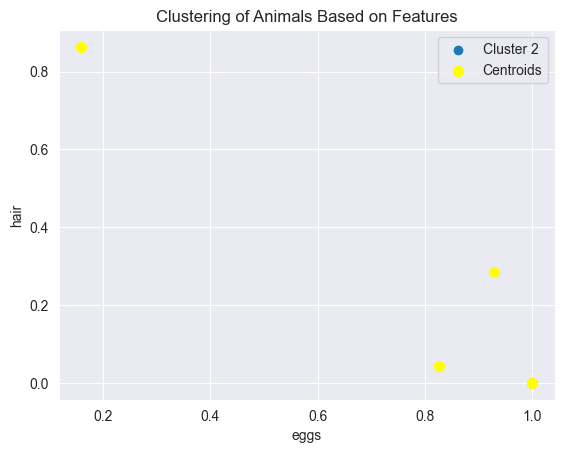

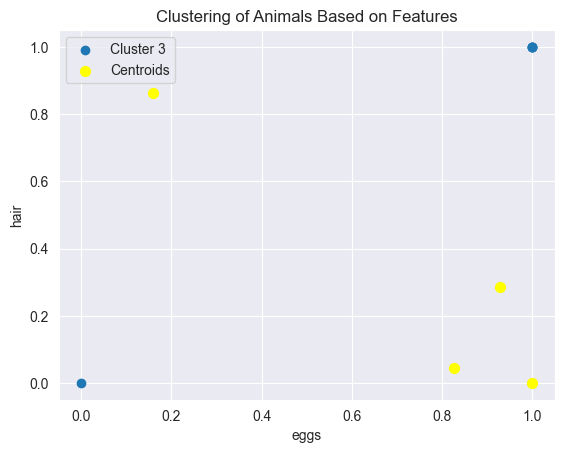

In [47]:
      
zoo = pd.read_csv('C:/Users/admin/Downloads/animal_DB/zoo.csv')

# Select the features for clustering
animal_features = zoo[['hair', 'feathers', 'eggs', 'milk', 'airborne',
                               'aquatic', 'predator', 'toothed', 'backbone', 'breathes',
                               'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']]

# Perform k-means clustering
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
y_kmeans = kmeans.fit_predict(animal_features)

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster_num in range(num_clusters):
    cluster_data = zoo[y_kmeans == cluster_num]
    plt.scatter(cluster_data['eggs'], cluster_data['hair'], label=f'Cluster {cluster_num}')

    # Plot centroids
    plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 0], s=50, c='yellow', label='Centroids')

    # Set plot details
    plt.title('Clustering of Animals Based on Features')
    plt.xlabel('eggs')
    plt.ylabel('hair')
    plt.legend()
    plt.show()